## Mall Dataset

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

### Context
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. 

Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. 

### Problem Statement 

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
customer = pd.read_csv("./Downloads/Mall Customers.csv")

In [3]:
customer.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


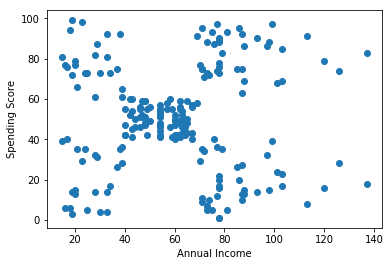

In [8]:
# Scatterplot of Annual Income and Spending Score
plt.scatter(customer["Annual Income (k$)"], 
            customer["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [9]:
mall = customer.drop(["CustomerID","Genre","Age"], axis = 1)

In [11]:
# Defining K Mean
k =KMeans()

In [124]:
# Finding WCSS
wcss = []
cluster_size = range(1,10)

In [125]:
for i in cluster_size:
    k = KMeans(n_clusters=i)
    model = k.fit(mall)
    wcss.append(k.inertia_)

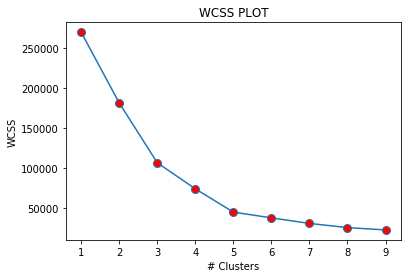

In [126]:
plt.plot(cluster_size, wcss, "-o", markerfacecolor="r", markersize = 8)
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.title("WCSS PLOT")
plt.show()

In [27]:
# Since n_clusters = 5, hence we will fit the clustering
k = KMeans(n_clusters=5)
labels = k.fit(mall).predict(mall)

In [85]:
labels

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [28]:
silhouette_score(mall, labels)

0.553931997444648

In [32]:
# Plotting Silhoutte
sil=[]
silhoutte=[]
for i in cluster_size:
    k = KMeans(n_clusters=i)
    model = k.fit(mall).predict(mall)
    sil = silhouette_score(mall, model)
    silhoutte.append(sil)

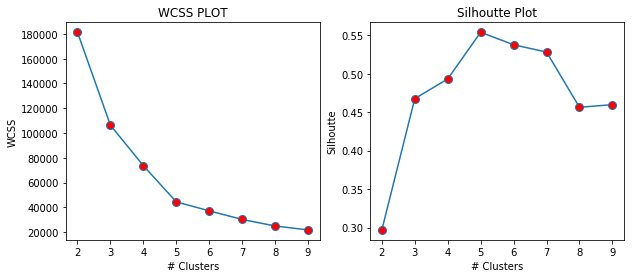

In [47]:
plt.figure(figsize=[10,4])
plt.subplot(121)
plt.plot(cluster_size, wcss, "-o", markerfacecolor="r", markersize = 8)
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.title("WCSS PLOT")


plt.subplot(122)
plt.plot(cluster_size, silhoutte, "-o", markerfacecolor="r", markersize = 8)
plt.xlabel("# Clusters")
plt.ylabel("Silhoutte")
plt.title("Silhoutte Plot")
plt.show()

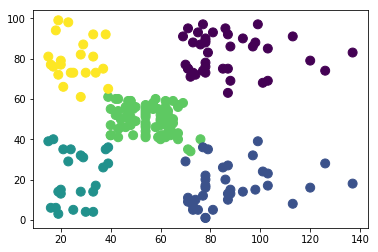

In [52]:
plt.scatter(mall["Annual Income (k$)"], mall["Spending Score (1-100)"],
           c =labels, s = 80)

In [53]:
import scipy.cluster.hierarchy as sch

# Dendrogram

Text(0.5,1,'Dendrogram')

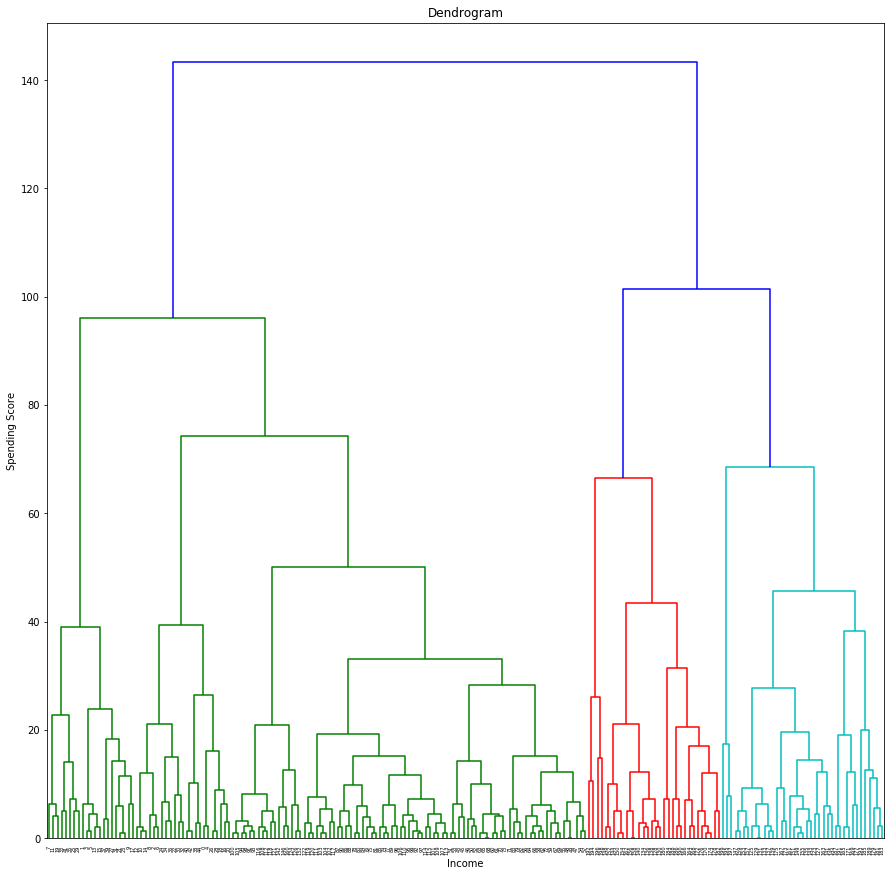

In [57]:
plt.figure(figsize=[15,15])
dend = sch.dendrogram(sch.linkage(mall, method="complete"))
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Dendrogram")

### Applying Agglomerative Clustering


In [58]:
agg = AgglomerativeClustering(n_clusters=5)

In [59]:
pred_agg = agg.fit_predict(mall)

In [60]:
pred_agg

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [62]:
pred_agg = pd.DataFrame(pred_agg)

In [63]:
pred_agg.columns=["Labels"]

In [66]:
newmall = pd.concat([mall, pred_agg], axis = 1)

In [67]:
newmall.head()

,Annual Income (k$),Spending Score (1-100),Labels
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


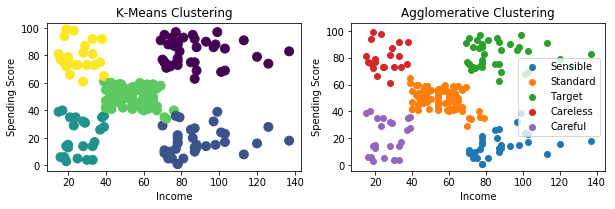

In [84]:
plt.figure(figsize=[10,6])
plt.subplot(221)
plt.scatter(mall["Annual Income (k$)"], mall["Spending Score (1-100)"],
           c =labels, s = 80)
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("K-Means Clustering")

plt.subplot(222)
plt.scatter(newmall[newmall.Labels==0]["Annual Income (k$)"],
            newmall[newmall.Labels==0]["Spending Score (1-100)"], 
            label = "Sensible")
plt.scatter(newmall[newmall.Labels==1]["Annual Income (k$)"],
            newmall[newmall.Labels==1]["Spending Score (1-100)"], 
            label = "Standard")
plt.scatter(newmall[newmall.Labels==2]["Annual Income (k$)"],
            newmall[newmall.Labels==2]["Spending Score (1-100)"], 
            label = "Target")
plt.scatter(newmall[newmall.Labels==3]["Annual Income (k$)"],
            newmall[newmall.Labels==3]["Spending Score (1-100)"], 
            label = "Careless")
plt.scatter(newmall[newmall.Labels==4]["Annual Income (k$)"],
            newmall[newmall.Labels==4]["Spending Score (1-100)"], 
            label = "Careful")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()

In [87]:
homogeneity_score(newmall.Labels, labels)

0.9510419321635281

# IRIS Dataset

In [88]:
from sklearn.datasets import load_iris

In [89]:
ir = load_iris()

In [92]:
iris = pd.DataFrame(ir.data,columns=ir.feature_names)

In [103]:
agg = AgglomerativeClustering(n_clusters=3)
pred_iris = agg.fit_predict(iris)

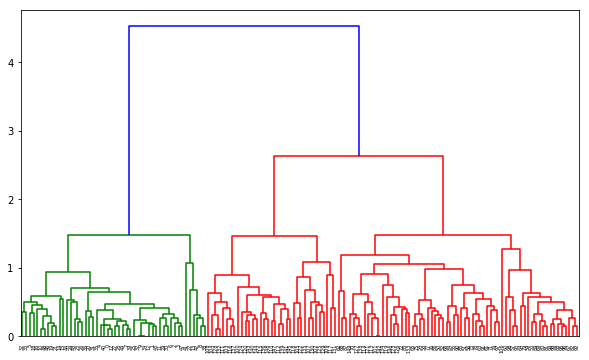

In [104]:
plt.figure(figsize=[10,6])
dendogram = sch.dendrogram(sch.linkage(iris, method="weighted"))

In [105]:
irispred = pd.DataFrame(pred_iris)

In [106]:
irispred.columns=["Species"]

In [107]:
newiris = pd.concat([iris, irispred], axis = 1)

In [108]:
homogeneity_score(ir.target, newiris.Species)

0.7608008469718723

In [109]:
silhouette_score(iris, newiris.Species)

0.5540972907866913

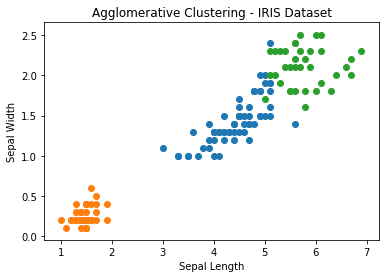

In [120]:
plt.scatter(newiris[newiris.Species==0]["petal length (cm)"],
            newiris[newiris.Species==0]["petal width (cm)"])
plt.scatter(newiris[newiris.Species==1]["petal length (cm)"],
            newiris[newiris.Species==1]["petal width (cm)"])
plt.scatter(newiris[newiris.Species==2]["petal length (cm)"],
            newiris[newiris.Species==2]["petal width (cm)"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Agglomerative Clustering - IRIS Dataset")
plt.show()

In [112]:
newiris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [128]:
college = pd.read_csv("./Downloads/College Data.csv")

In [129]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [130]:
college.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [132]:
college.shape

(777, 19)

In [133]:
college.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [134]:
coll_new = college.drop(['Unnamed: 0', 'Private'], axis = 1)

In [135]:
clusters = range(1,10)
wcss = []

In [136]:
for i in clusters:
    k = KMeans(n_clusters=i)
    model = k.fit(coll_new)
    wcss.append(k.inertia_)

In [140]:
silhoutte = []
for i in range(2,10):
    k = KMeans(n_clusters=i)
    model = k.fit(coll_new).predict(coll_new)
    silhoutte.append(silhouette_score(coll_new, model))

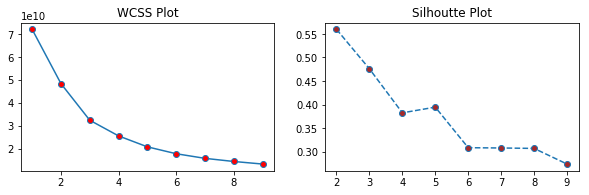

In [144]:
plt.figure(figsize=[10,6])
plt.subplot(221)
plt.plot(clusters, wcss, "-o", markerfacecolor = "red")
plt.title("WCSS Plot")

plt.subplot(222)
plt.plot(range(2,10), silhoutte, "-o", 
         markerfacecolor = "brown", linestyle="dashed")
plt.title("Silhoutte Plot")
plt.show()

# Clusters =5

In [145]:
coll_new.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

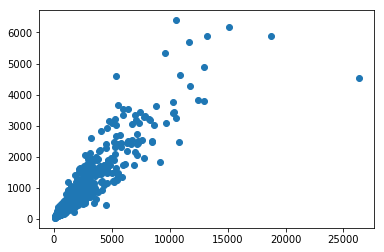

In [146]:
plt.scatter(coll_new.Accept, coll_new.Enroll)

In [148]:
# AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5)

In [150]:
pred_college = agg.fit_predict(coll_new)

In [152]:
college_agg = pd.DataFrame(pred_college)

In [153]:
college_agg.columns=["College_Labels"]

In [155]:
newcollege = pd.concat([coll_new, college_agg], axis = 1)

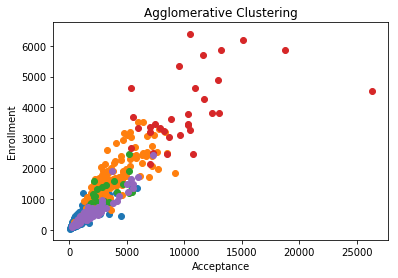

In [163]:
plt.scatter(newcollege[newcollege.College_Labels==0]["Accept"],
newcollege[newcollege.College_Labels==0]["Enroll"])
plt.scatter(newcollege[newcollege.College_Labels==1]["Accept"],
newcollege[newcollege.College_Labels==1]["Enroll"])
plt.scatter(newcollege[newcollege.College_Labels==2]["Accept"],
newcollege[newcollege.College_Labels==2]["Enroll"])
plt.scatter(newcollege[newcollege.College_Labels==3]["Accept"],
newcollege[newcollege.College_Labels==3]["Enroll"])
plt.scatter(newcollege[newcollege.College_Labels==4]["Accept"],
newcollege[newcollege.College_Labels==4]["Enroll"])
plt.xlabel("Acceptance")
plt.ylabel("Enrollment")
plt.title("Agglomerative Clustering")
plt.show()

## Findings

1. Cluster 0 and Cluster 4 appears to be similar.


In [191]:
d0 = newcollege[newcollege.College_Labels==0]
d1 = newcollege[newcollege.College_Labels==1]
d2 = newcollege[newcollege.College_Labels==2]
d3 = newcollege[newcollege.College_Labels==3]
d4 = newcollege[newcollege.College_Labels==4]

In [166]:
d0.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,College_Labels
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,0


In [186]:
d4.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,College_Labels
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,4
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,4
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,4
10,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73,4
11,2652,1900,484,44,77,1707,44,17080,4440,400,600,73,91,9.9,41,11711,76,4


C:\Users\IT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


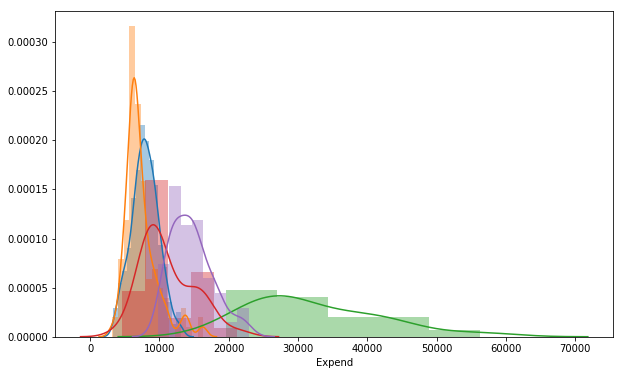

In [193]:
plt.figure(figsize=[10,6])
sns.distplot(d0.Expend)
sns.distplot(d1.Expend)
sns.distplot(d2.Expend)
sns.distplot(d3.Expend)
sns.distplot(d4.Expend)